# Hoja 2:

## Ejercicio 1:

#### Sea (X, f) un sistema dinamico con X c R^2. Implementar los siguientes procedimientos:

#### 1. orb_num_2d y orb_num_2d_av. El primero es para calcular numéricamente toda la órbita numérica de un punto x0 en R^2 hasta cierta iteración n. El segundo es para calcular solamente estados avanzados de la órbita, es decir, los términos a partir de una cierta iteración.

In [17]:
import numpy as np

def orb_num_2d(f, x0, n):
    orbita = [np.array(x0)]
    for _ in range(n):
        x0 = f(x0)
        orbita.append(np.array(x0))
    return orbita

def orb_num_2d_av(f, x0, n, m):
    orbita = orb_num_2d(f, x0, n)
    return orbita[m:]

#### 2. an_graf_2d y an_graf_2d_av. El primero es para pintar todos los puntos de la órbita de x0 hasta cierta iteración n. El segundo es análogo pero para un estado avanzado de dicha órbita.

In [18]:
import matplotlib.pyplot as plt

def an_graf_2d(f, x0, n):
    # Calcular la órbita usando orb_num    
    orbita = orb_num_2d(f, x0, n)

    # Dibujar los segmentos entre los puntos consecutivos
    for i in range(len(orbita) - 1):
        x_prev, y_prev = orbita[i]
        x_next, y_next = orbita[i + 1]
        # Línea entre puntos consecutivos
        plt.plot([x_prev, x_next], [y_prev, y_next], 'r-', lw=1)
        # Dibujar puntos
        plt.plot(x_next, y_next, 'ro', markersize=4)

    # Punto inicial
    plt.plot(orbita[0][0], orbita[0][1], 'go', markersize=6)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def an_graf_2d_av(f, x0, n, m):
    # Calcular la órbita usando orb_num
    orbita = orb_num_2d_av(f, x0, n, m)

    # Dibujar segmentos entre puntos consecutivos desde la iteración m
    for i in range(len(orbita) - 1):
        x_prev, y_prev = orbita[i]
        x_next, y_next = orbita[i + 1]
        plt.plot([x_prev, x_next], [y_prev, y_next], 'r-', lw=1) 
        plt.plot(x_next, y_next, 'ro', markersize=4)

    # Punto de partida.
    plt.plot(orbita[0][0], orbita[0][1], 'go', markersize=6)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#### 3. an_graf_2d_lineas y an_graf_2d_lineas_av. El primero es para representar gráficamente la órbita de x0, dibujando un segmento entre f^k(x0) y f^{k+1}(x0) para todo k. El segundo hace lo mismo pero a partir de una cierta iteración m.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def an_graf_2d_lineas(f, x0, n):
    # Calcular la órbita usando orb_num
    orbita = orb_num_2d(f, x0, n)

    # Dibujar líneas entre puntos consecutivos
    for i in range(len(orbita) - 1):
        x_start, y_start = orbita[i]
        x_end, y_end = orbita[i + 1]
        plt.plot([x_start, x_end], [y_start, y_end], 'r-', lw=1)

    # Punto inicial
    plt.plot(orbita[0][0], orbita[0][1], 'go', markersize=4)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

def an_graf_2d_lineas_av(f, x0, n, m):
    # Calcular la órbita usando orb_num
    orbita = orb_num_2d_av(f, x0, n, m)

    for i in range(len(orbita) - 1):
        x_start, y_start = orbita[i]
        x_end, y_end = orbita[i + 1]
        plt.plot([x_start, x_end], [y_start, y_end], 'r-', lw=1)

    # Punto inicial desde m
    plt.plot(orbita[0][0], orbita[0][1], 'go', markersize=4)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

#### 4. an_graf_2d_lineas_animado, para que se observe la evolución de la órbita de x0 paso a paso hasta cierta iteración n.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def an_graf_2d_lineas_animado(f, x0, n, intervalo=300):
    # Calcular la órbita usando orb_num    
    orbita = orb_num_2d(f, x0, n)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(min(p[0] for p in orbita) - 0.5, max(p[0] for p in orbita) + 0.5)
    ax.set_ylim(min(p[1] for p in orbita) - 0.5, max(p[1] for p in orbita) + 0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    linea, = ax.plot([], [], 'r-')
    ax.plot(orbita[0][0], orbita[0][1], 'go', markersize=6)
    puntos = [orbita[0]]

    def update(i):
        if i < len(orbita) - 1:
            puntos.append(orbita[i + 1])
            xs, ys = zip(*puntos)
            linea.set_data(xs, ys)
        return linea,

    ani = FuncAnimation(fig, update, frames=n, interval=intervalo, blit=True, repeat=False)

    plt.show()

## Ejercicio 2:

### Estúdiense los puntos fijos y el carácter de éstos para los siguientes sistemas dinámicos en (R^2, f), con f una función de clase 1. Decídase si la cuenca de atracción de cada punto fijo es todo el plano R^2 o no lo es, y calcúlense las órbitas de varios puntos tanto dentro como fuera de esta cuenca cuando sea posible. ¿Observas en algún caso la existencia de atractores extraños?

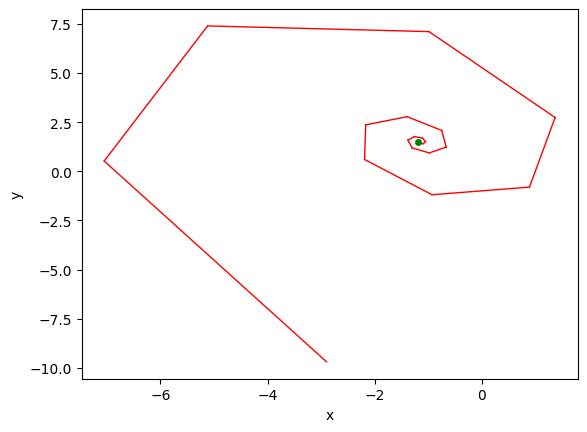

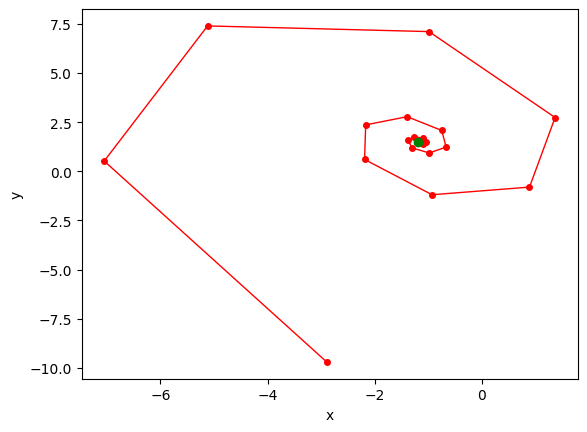

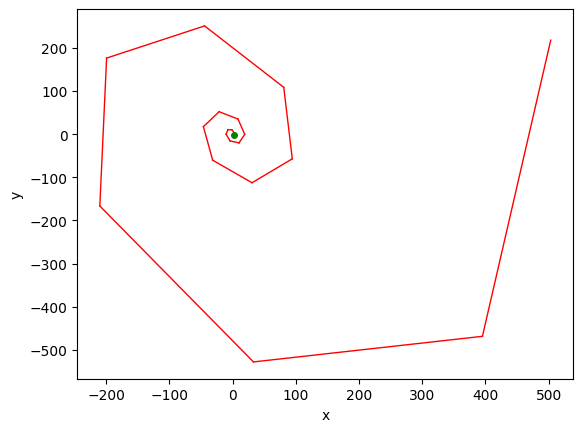

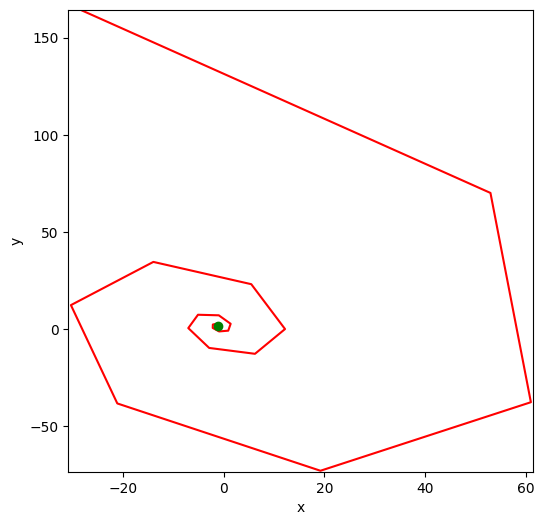

In [21]:
import numpy as np

def f1(v):
    x, y = v
    fx = (5/12) * (x - np.sqrt(3)*y + 1)
    fy = np.sqrt(3)*x + y + 2
    return [fx, fy]

x0 = [-1.2, 1.5]  # Punto cercano al punto fijo
an_graf_2d_lineas(f1, x0, n=20)

an_graf_2d(f1, x0, n=20)

an_graf_2d_lineas(f1, [2, -2], n=20)


an_graf_2d_lineas_animado(f1, x0=[-1.2, 1.5], n=30)